In [1]:
import pandas as pd 
df = pd.read_csv("market.csv", encoding="cp1252") # encoding - tells pamdas how text is ecoded!!
print(df.shape) # rows and columns 

(541909, 8)


Performing EDA

In [2]:
#Going towards EDA 
# Basic structure of the data understanding-
print(df.head())   # print first 5 rows!!

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

        InvoiceDate  UnitPrice  CustomerID         Country  
0  01-12-2010 08:26       2.55     17850.0  United Kingdom  
1  01-12-2010 08:26       3.39     17850.0  United Kingdom  
2  01-12-2010 08:26       2.75     17850.0  United Kingdom  
3  01-12-2010 08:26       3.39     17850.0  United Kingdom  
4  01-12-2010 08:26       3.39     17850.0  United Kingdom  


In [3]:
# it gives column names count of non null values and datatype 
print(df.info()) 
# i noticed that there are 8 columns and their datatypes 
# need to change the datatype of invoice date and customer id


<class 'pandas.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  str    
 1   StockCode    541909 non-null  str    
 2   Description  540455 non-null  str    
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  str    
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  str    
dtypes: float64(2), int64(1), str(5)
memory usage: 33.1 MB
None


In [4]:
# for statastical summary of the data
print(df.describe())
# I understand that quantity and unitprice containig negative values which is not possible
# Customer id's are null somewhere

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


In [5]:
# calculating null values duplicate things and statastical data anylysis
null_counts = df.isnull().sum()
print(null_counts)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [6]:
# EDA
# count of duplicate rows in dataset
dupicate_counts = df.duplicated().sum()
print("Duplicate counts are :" + str(dupicate_counts))
#print that duplicate rows
df[df.duplicated()].head()

Duplicate counts are :5268


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom


In [7]:
# Data preprocessing
# drop that duplicate rows
df = df.drop_duplicates()
# count of duplicate rows in dataset
dupicate_counts = df.duplicated().sum()
print("Duplicate counts after dropping duplicates are :" + str(dupicate_counts))
print(df.shape)

Duplicate counts after dropping duplicates are :0
(536641, 8)


In [8]:
#checking the columns of dataframe
df.columns=(
    df.columns
    .str.lower()
)
df.columns

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='str')

In [9]:
# EDA
# checking the negative quantities
counts=(df['quantity']<=0).sum()

print(f"Total counts of negative quantity:{counts}")
df[df['quantity']<0]

Total counts of negative quantity:10587


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
141,C536379,D,Discount,-1,01-12-2010 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01-12-2010 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01-12-2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01-12-2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,09-12-2011 09:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,09-12-2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,09-12-2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,09-12-2011 11:58,1.25,17315.0,United Kingdom


In [10]:
# checking the datatype so i can drop the negative quantity rows with int type
print(df['quantity'].dtype)
print(df['quantity'].head(10))


int64
0     6
1     6
2     8
3     6
4     6
5     2
6     6
7     6
8     6
9    32
Name: quantity, dtype: int64


In [11]:
# Data preprocessing
# drop the negative quantity rows
df.drop(df[df['quantity'] <= 0].index, inplace=True)
# checking the negative quantities after dropping
counts=(df['quantity']<=0).sum()
print(f"Total counts of negative quantity after dropping:{counts}")
print(df.shape)

Total counts of negative quantity after dropping:0
(526054, 8)


In [12]:
# checking zero or negative prices 
counts=(df['unitprice']<=0).sum()
print(f"Total counts of zero or negative price:{counts}")
df[df['unitprice']<=0]


Total counts of zero or negative price:1176


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
622,536414,22139,NaN,56,01-12-2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,01-12-2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,01-12-2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,01-12-2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535334,581211,22142,check,14,07-12-2011 18:36,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,08-12-2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,08-12-2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,08-12-2011 13:58,0.0,NaN,United Kingdom


In [13]:
# Data preprocessing
# drop the negative quantity rows       
# cheking the rows after dropping 
df.drop(df[df['unitprice'] <= 0].index, inplace=True)
counts=(df['unitprice']<=0).sum()   
print(f"Total counts of zero or negative price after dropping:{counts}")
print(df.shape)

Total counts of zero or negative price after dropping:0
(524878, 8)


# Cleaning the Description column !!!!

In [14]:

# Step 1: Fill missing values and strip spaces
df['description'] = df['description'].fillna("").str.strip()

# Check the first 10 descriptions
print(df['description'].head(10))




0     WHITE HANGING HEART T-LIGHT HOLDER
1                    WHITE METAL LANTERN
2         CREAM CUPID HEARTS COAT HANGER
3    KNITTED UNION FLAG HOT WATER BOTTLE
4         RED WOOLLY HOTTIE WHITE HEART.
5           SET 7 BABUSHKA NESTING BOXES
6      GLASS STAR FROSTED T-LIGHT HOLDER
7                 HAND WARMER UNION JACK
8              HAND WARMER RED POLKA DOT
9          ASSORTED COLOUR BIRD ORNAMENT
Name: description, dtype: str


In [15]:
# Step 2: convert all descriptions to lowercase
df['description'] = df['description'].str.lower()

# Check first 10 descriptions
print(df['description'].head(10))




0     white hanging heart t-light holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4         red woolly hottie white heart.
5           set 7 babushka nesting boxes
6      glass star frosted t-light holder
7                 hand warmer union jack
8              hand warmer red polka dot
9          assorted colour bird ornament
Name: description, dtype: str


In [16]:
# List of known invalid keywords
invalid_keywords = ['discount', 'postage', 'manual', 'adjustment', 'refund', 'lost', '???', 'wet', 'mixed up','17850']

# Remove invalid keywords AND empty strings
valid_mask = (~df['description'].isin(invalid_keywords)) & (df['description'] != "")

# Apply mask
df = df[valid_mask]


# Check first 10 descriptions after removing invalid ones
print(df['description'].head(10))
print("Total invalid descriptions removed:", (~valid_mask).sum())


0     white hanging heart t-light holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4         red woolly hottie white heart.
5           set 7 babushka nesting boxes
6      glass star frosted t-light holder
7                 hand warmer union jack
8              hand warmer red polka dot
9          assorted colour bird ornament
Name: description, dtype: str
Total invalid descriptions removed: 1443


In [17]:
# Drop rows with missing customerid
df = df.dropna(subset=['customerid'])

In [18]:
# calculating null values after cleaning
null_counts = df.isnull().sum()
print(null_counts)

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64


In [19]:
df[df['invoiceno'].str.startswith('C')]


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country


In [20]:
df[['quantity','unitprice',]].describe()


,quantity,unitprice
count,391314.000000,391314.000000
mean,13.140212,2.921056
std,180.770109,7.267967
min,1.000000,0.001000
25%,2.000000,1.250000
50%,6.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,1599.260000


In [21]:
# changing the datatype of invoicedate
df['invoicedate'] = pd.to_datetime(df['invoicedate'], errors='coerce')
print(df['invoicedate'].dtype)
print(df['invoicedate'].head(10))

datetime64[us]
0   2010-01-12 08:26:00
1   2010-01-12 08:26:00
2   2010-01-12 08:26:00
3   2010-01-12 08:26:00
4   2010-01-12 08:26:00
5   2010-01-12 08:26:00
6   2010-01-12 08:26:00
7   2010-01-12 08:28:00
8   2010-01-12 08:28:00
9   2010-01-12 08:34:00
Name: invoicedate, dtype: datetime64[us]


Feature Engineering creating totalprice

In [22]:
df['totalprice'] = df['quantity'] * df['unitprice']
df[['quantity', 'unitprice', 'totalprice']].head(10)


,quantity,unitprice,totalprice
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34
5,2,7.65,15.30
6,6,4.25,25.50
7,6,1.85,11.10
8,6,1.85,11.10
9,32,1.69,54.08


In [23]:
df['customerid'] = df['customerid'].astype(int)
print(df['customerid'].dtype)
print(df['customerid'].head(10))

int64
0    17850
1    17850
2    17850
3    17850
4    17850
5    17850
6    17850
7    17850
8    17850
9    13047
Name: customerid, dtype: int64


In [24]:
#checking cleaned data
df.head()
df.info()
df.shape


<class 'pandas.DataFrame'>
Index: 391314 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    391314 non-null  str           
 1   stockcode    391314 non-null  str           
 2   description  391314 non-null  str           
 3   quantity     391314 non-null  int64         
 4   invoicedate  165783 non-null  datetime64[us]
 5   unitprice    391314 non-null  float64       
 6   customerid   391314 non-null  int64         
 7   country      391314 non-null  str           
 8   totalprice   391314 non-null  float64       
dtypes: datetime64[us](1), float64(2), int64(2), str(4)
memory usage: 29.9 MB


(391314, 9)

Saving cleaned file for recommendation !!

In [25]:
# saving cleaned file!
df.to_csv("cleaned_market.csv", index=False)

Performing Bussiness insights !!!

In [26]:
total_transactions = df['invoiceno'].nunique()
print(f"Total unique transactions: {total_transactions}")

Total unique transactions: 18416


In [27]:
total_items_sold = df['quantity'].sum()
print(f"Total items sold: {total_items_sold}")

Total items sold: 5141949


In [28]:
totalprice = df['totalprice'].sum()
print(f"Total revenue: {totalprice}")

Total revenue: 8755985.004


In [29]:
print("Top 10 products by quantity sold:")
top_products = df.groupby('description')['quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)


Top 10 products by quantity sold:
description
paper craft , little birdie           80995
medium ceramic top storage jar        77916
world war 2 gliders asstd designs     54319
jumbo bag red retrospot               46078
white hanging heart t-light holder    36706
assorted colour bird ornament         35263
pack of 72 retrospot cake cases       33670
popcorn holder                        30919
rabbit night light                    27153
mini paint set vintage                26076
Name: quantity, dtype: int64


In [30]:
print("Top 10 customers by total purchase value:")
top_customers = df.groupby('customerid')['totalprice'].sum().sort_values(ascending=False).head(10)
print(top_customers)

Top 10 customers by total purchase value:
customerid
14646    279138.02
18102    259657.30
17450    194390.79
16446    168472.50
14911    140336.83
12415    124564.53
14156    117210.08
17511     91062.38
12346     77183.60
16029     72708.09
Name: totalprice, dtype: float64


In [32]:
unique_transactions_by_country = df.groupby('country')['invoiceno'].nunique().sort_values(ascending=False)
print(unique_transactions_by_country)


country
United Kingdom          16590
Germany                   443
France                    380
EIRE                      258
Belgium                    98
Netherlands                93
Spain                      88
Australia                  56
Portugal                   49
Switzerland                47
Finland                    40
Italy                      35
Sweden                     34
Norway                     32
Channel Islands            25
Japan                      19
Poland                     19
Denmark                    18
Austria                    17
Cyprus                     14
Unspecified                 8
Iceland                     7
Canada                      5
Greece                      5
USA                         5
Malta                       5
Israel                      5
Singapore                   4
Lithuania                   4
European Community          3
Bahrain                     2
United Arab Emirates        2
Czech Republic              2
Br

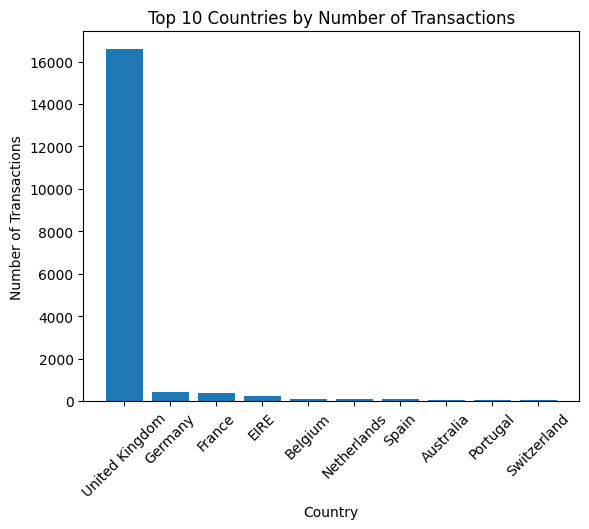

In [50]:
import matplotlib.pyplot as plt

top10 = unique_transactions_by_country.head(10)

plt.figure()
plt.bar(top10.index, top10.values)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.title("Top 10 Countries by Number of Transactions")
plt.show()


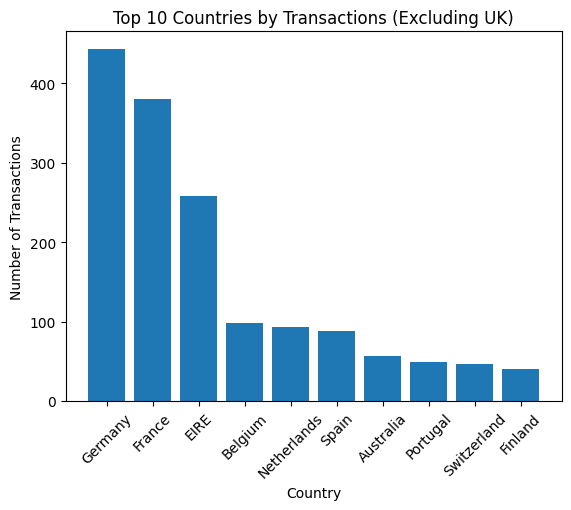

In [51]:
# here united kindom is dominating so we dropping it!!
no_uk = unique_transactions_by_country.drop('United Kingdom')

top10_no_uk = no_uk.head(10)

plt.figure()
plt.bar(top10_no_uk.index, top10_no_uk.values)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Number of Transactions")
plt.title("Top 10 Countries by Transactions (Excluding UK)")
plt.show()


least products , customers,countries

In [33]:
print("Bottom 10 products by quantity sold:")
least_products = df.groupby('description')['quantity'].sum().sort_values().head(10)
print(least_products)


Bottom 10 products by quantity sold:
description
set 36 colouring pencils doiley       1
necklace+bracelet set pink daisy      1
new baroque b'fly necklace pink       1
mummy mouse red gingham ribbon        1
blue padded soft mobile               1
blue leaves and beads phone charm     1
blue new baroque flock candlestick    1
cracked glaze earrings brown          1
jardin etched glass butter dish       1
cracked glaze earrings red            1
Name: quantity, dtype: int64


In [34]:
print("Bottom 10 customers by  purchased:")
least_customers_price = df.groupby('customerid')['totalprice'].sum().sort_values().head(10)
print(least_customers_price)

Bottom 10 customers by  purchased:
customerid
16738     3.75
16454     5.90
14792     6.20
17956    12.75
16878    13.30
17763    15.00
13307    15.00
15823    15.00
16093    17.00
17986    20.80
Name: totalprice, dtype: float64


In [35]:
print("Bottom 10 countries by unique transactions:")
least_countries = df.groupby('country')['invoiceno'].nunique().sort_values().head(10)
print(least_countries)

Bottom 10 countries by unique transactions:
country
Brazil                  1
Saudi Arabia            1
RSA                     1
Lebanon                 1
Czech Republic          2
Bahrain                 2
United Arab Emirates    2
European Community      3
Singapore               4
Lithuania               4
Name: invoiceno, dtype: int64


In [36]:
sales_by_year = df.groupby(df['invoicedate'].dt.year)['totalprice'].sum()
print(sales_by_year)

invoicedate
2010.0     358579.85
2011.0    3445619.29
Name: totalprice, dtype: float64


In [37]:
# Create a mapping for month numbers → names
month_map = {
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}

# Aggregate sales by month and map names
sales_by_month = df.groupby(df['invoicedate'].dt.month)['totalprice'].sum().rename(index=month_map)

print(sales_by_month)


invoicedate
Jan    281540.61
Feb    254085.40
Mar    271360.65
Apr    319218.89
May    348070.75
Jun    332985.16
Jul    373247.30
Aug    291391.89
Sep    456618.29
Oct    321109.62
Nov    336210.36
Dec    218360.22
Name: totalprice, dtype: float64


In [38]:


# Month mapping
month_map = {
    1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
    7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'
}

# Aggregate and reset index safely
sales_df = df.groupby([
    df['invoicedate'].dt.year.rename('Year'),
    df['invoicedate'].dt.month.rename('Month')
])['totalprice'].sum().reset_index()

# Map month numbers to names
sales_df['Month'] = sales_df['Month'].map(month_map)

# Optional: sort by Year then Month
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sales_df['Month'] = pd.Categorical(sales_df['Month'], categories=month_order, ordered=True)
sales_df = sales_df.sort_values(['Year','Month']).reset_index(drop=True)

print(sales_df)



      Year Month  totalprice
0   2010.0   Jan    46085.29
1   2010.0   Feb    47179.57
2   2010.0   Mar    23530.93
3   2010.0   May    30905.32
4   2010.0   Jun    30907.90
5   2010.0   Jul    53514.96
6   2010.0   Aug    38742.24
7   2010.0   Sep    37700.91
8   2010.0   Oct    32910.38
9   2010.0   Dec    17102.35
10  2011.0   Jan   235455.32
11  2011.0   Feb   206905.83
12  2011.0   Mar   247829.72
13  2011.0   Apr   319218.89
14  2011.0   May   317165.43
15  2011.0   Jun   302077.26
16  2011.0   Jul   319732.34
17  2011.0   Aug   252649.65
18  2011.0   Sep   418917.38
19  2011.0   Oct   288199.24
20  2011.0   Nov   336210.36
21  2011.0   Dec   201257.87


In [39]:
df['invoicedate'].dtype

dtype('<M8[us]')

In [40]:
print(df['invoicedate'].head())
print("Number of missing invoice dates:", df['invoicedate'].isna().sum())
df[df['invoicedate'].isna()].head()



0   2010-01-12 08:26:00
1   2010-01-12 08:26:00
2   2010-01-12 08:26:00
3   2010-01-12 08:26:00
4   2010-01-12 08:26:00
Name: invoicedate, dtype: datetime64[us]
Number of missing invoice dates: 225531


,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country,totalprice
26732,538521,21754,home building block word,3,NaT,5.95,14180,United Kingdom,17.85
26733,538521,21755,love building block word,3,NaT,5.95,14180,United Kingdom,17.85
26734,538521,22072,red retrospot tea cup and saucer,8,NaT,3.75,14180,United Kingdom,30.00
26735,538521,22846,bread bin diner style red,1,NaT,16.95,14180,United Kingdom,16.95
26736,538521,22849,bread bin diner style mint,1,NaT,16.95,14180,United Kingdom,16.95


In [41]:
df.groupby('invoiceno')['invoicedate'].count().sample(10)


invoiceno
579464     0
540187    41
547714     0
559866     0
551350     0
581414    64
571412     0
541268     0
578113     0
539471     0
Name: invoicedate, dtype: int64

In [42]:
df['invoicedate'] = df.groupby('invoiceno')['invoicedate'].transform('first')
missing_after = df['invoicedate'].isna().sum()
print("Missing after filling:", missing_after)



Missing after filling: 225531


In [43]:
df['invoicedate'].head()
df.info()

<class 'pandas.DataFrame'>
Index: 391314 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    391314 non-null  str           
 1   stockcode    391314 non-null  str           
 2   description  391314 non-null  str           
 3   quantity     391314 non-null  int64         
 4   invoicedate  165783 non-null  datetime64[us]
 5   unitprice    391314 non-null  float64       
 6   customerid   391314 non-null  int64         
 7   country      391314 non-null  str           
 8   totalprice   391314 non-null  float64       
dtypes: datetime64[us](1), float64(2), int64(2), str(4)
memory usage: 29.9 MB


In [44]:
df_time = df.dropna(subset=['invoicedate'])
df_time.info()
df_time['invoicedate'].isna().sum()

<class 'pandas.DataFrame'>
Index: 165783 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   invoiceno    165783 non-null  str           
 1   stockcode    165783 non-null  str           
 2   description  165783 non-null  str           
 3   quantity     165783 non-null  int64         
 4   invoicedate  165783 non-null  datetime64[us]
 5   unitprice    165783 non-null  float64       
 6   customerid   165783 non-null  int64         
 7   country      165783 non-null  str           
 8   totalprice   165783 non-null  float64       
dtypes: datetime64[us](1), float64(2), int64(2), str(4)
memory usage: 12.6 MB


np.int64(0)

In [45]:
df_time['Year'] = df_time['invoicedate'].dt.year
df_time['Month'] = df_time['invoicedate'].dt.month_name()
df_time['Day'] = df_time['invoicedate'].dt.day_name()
df_time['Week'] = df_time['invoicedate'].dt.isocalendar().week
df_time[['invoicedate', 'Year', 'Month', 'Day', 'Week']].sample(10)


,invoicedate,Year,Month,Day,Week
258841,2011-11-07 14:10:00,2011,November,Monday,45
177754,2011-06-05 13:35:00,2011,June,Sunday,22
257639,2011-10-07 12:25:00,2011,October,Friday,40
527164,2011-05-12 16:03:00,2011,May,Thursday,19
290503,2011-04-08 15:07:00,2011,April,Friday,14
182681,2011-10-05 11:54:00,2011,October,Wednesday,40
451237,2011-09-11 09:07:00,2011,September,Sunday,36
439942,2011-04-11 13:04:00,2011,April,Monday,15
334639,2011-11-09 12:56:00,2011,November,Wednesday,45
333544,2011-09-09 14:14:00,2011,September,Friday,36


In [46]:
df_time['YearMonth'] = df_time['invoicedate'].dt.to_period('M')
monthly_sales = df_time.groupby('YearMonth')['totalprice'].sum()
df_time['YearMonth'].head()



0    2010-01
1    2010-01
2    2010-01
3    2010-01
4    2010-01
Name: YearMonth, dtype: period[M]

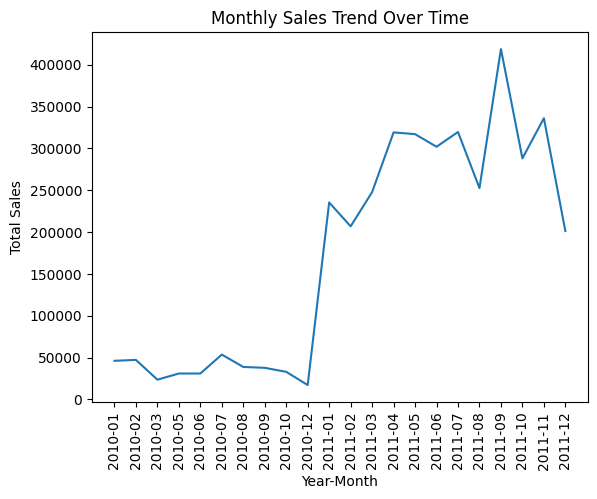

In [47]:
# Visualizing the monthly-year sales trend 
import matplotlib.pyplot as plt
plt.figure()
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)
plt.xticks(rotation=90)
plt.xlabel("Year-Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend Over Time")
plt.show()


In [48]:
monthly_items = df_time.groupby('YearMonth')['quantity'].sum()
print(monthly_items)

YearMonth
2010-01     24107
2010-02     31076
2010-03     11781
2010-05     16162
2010-06     16093
2010-07     19392
2010-08     21447
2010-09     17356
2010-10     15896
2010-12     10533
2011-01    145850
2011-02    121200
2011-03    134841
2011-04    191970
2011-05    198456
2011-06    181456
2011-07    185922
2011-08    151655
2011-09    229737
2011-10    147575
2011-11    198217
2011-12    123952
Freq: M, Name: quantity, dtype: int64


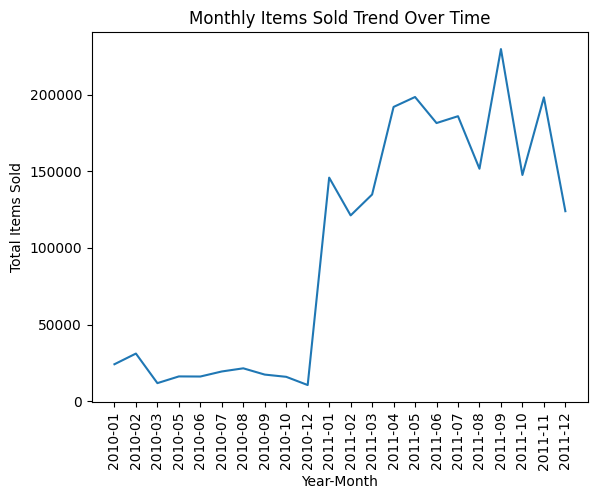

In [49]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_items.index.astype(str), monthly_items.values)
plt.xticks(rotation=90)
plt.xlabel("Year-Month")
plt.ylabel("Total Items Sold")
plt.title("Monthly Items Sold Trend Over Time")
plt.show()
